In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
raw_data = pd.read_csv('crime_Stop_And_Search.csv')
print(raw_data.shape)

(1232309, 19)


In [6]:
raw_data['Formatted_Date'] = pd.to_datetime(raw_data.Date, format = '%Y-%m-%d %H:%M:%S')
raw_data = raw_data.sort_values(by='Formatted_Date')
raw_data['Small_Date'] = raw_data['Formatted_Date'].dt.strftime('%d-%m-%Y')
raw_data['Small_Date'] = pd.to_datetime(raw_data['Small_Date'], format = '%d-%m-%Y')
raw_data['Month_Year'] = raw_data['Formatted_Date'].dt.strftime('%m-%Y')
raw_data['Month_Year_Without_Format'] = raw_data['Formatted_Date'].dt.strftime('%m-%Y')
raw_data['Month_Year'] = pd.to_datetime(raw_data['Month_Year'], format = '%m-%Y')
raw_data['Small_Timestamp'] = raw_data['Small_Date'].values.astype(np.int64) // 10**9
group_data_date = raw_data.groupby(['Small_Date', 'Small_Timestamp'])
group_data_month = raw_data.groupby(['Month_Year_Without_Format'])

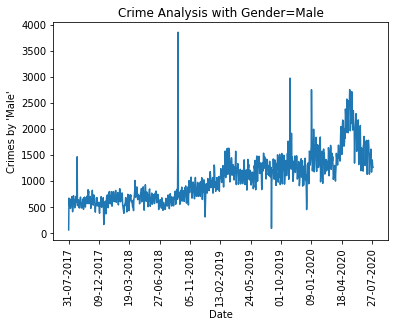

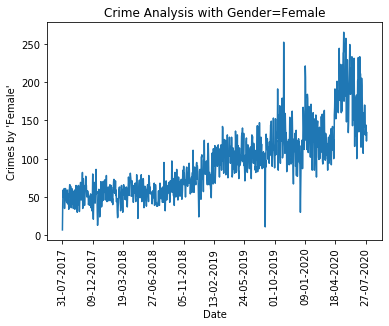

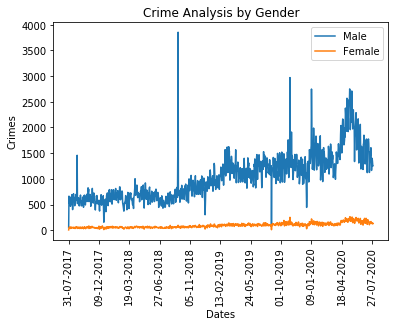

In [39]:
%matplotlib inline
def analyze_col_data_with_time(data, col_name, col_value, rotation=90):
    raw_data = data.sort_values(by='Small_Timestamp')
    group_data_date = raw_data.groupby(['Small_Date', 'Small_Timestamp'])
    return_data = {}
    for small_date, values in group_data_date:
        temp_data = values[values[col_name] == col_value]
        return_data[small_date[0].strftime('%d-%m-%Y')] = temp_data.shape[0]
    key_dates = return_data.keys()
    key_dates = list(map(str, key_dates))
    value_dates = return_data.values()
    value_dates = list(map(int, value_dates))
    
    plt.plot(key_dates, value_dates)
    plt.xlabel('Date')
    plt.ylabel(f"Crimes by '{col_value}'")
    locs, labels = plt.xticks()
    total_bins = int(len(locs)/10)
    plt.xticks(locs[::total_bins], key_dates[::total_bins])
    plt.xticks(rotation=rotation)
    locs, labels = plt.xticks()
    plt.title(f"Crime Analysis with {col_name}={col_value}")
    plt.show()
    return key_dates, value_dates

def multiplots_same_time(key_values, values, xlabel, legends, col_name, rotation=90):
    for key_dates, value_dates in zip(key_values, values):
        plt.plot(key_dates, value_dates)
        plt.xlabel(xlabel)
        plt.ylabel(f"Crimes")
        locs, labels = plt.xticks()
        total_bins = int(len(locs)/10)
        locs, labels = plt.xticks()
        plt.title(f"Crime Analysis by {col_name}")
    plt.xticks(locs[::total_bins], key_dates[::total_bins])
    plt.xticks(rotation=rotation)
    plt.legend(legends)
    plt.show()
        
datesmale, valuesmale = analyze_col_data_with_time(raw_data, 'Gender', 'Male')
datesfemale, valuesfemale = analyze_col_data_with_time(raw_data, 'Gender', 'Female')
multiplots_same_time([datesmale, datesfemale], [valuesmale, valuesfemale], 'Dates', ['Male', 'Female'], 'Gender')


In [40]:
def multiplots_with_date_and_columns_value(raw_data, data, col_name):
    x_data = []
    y_data = []
    for val in data: 
        dates, values = analyze_col_data_with_time(raw_data, col_name, val)
        x_data.append(dates)
        y_data.append(values)
    multiplots_same_time(x_data, y_data, 'Dates', data, col_name)

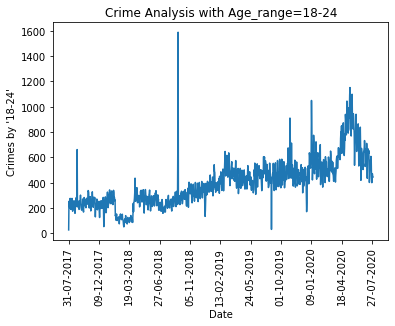

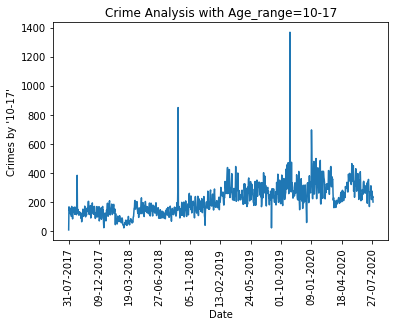

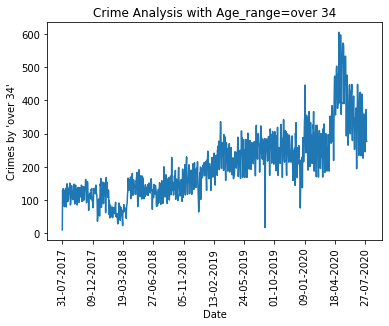

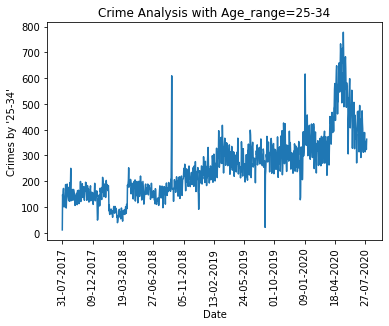

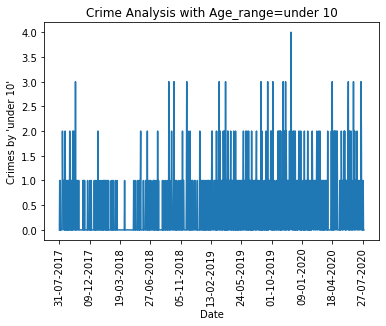

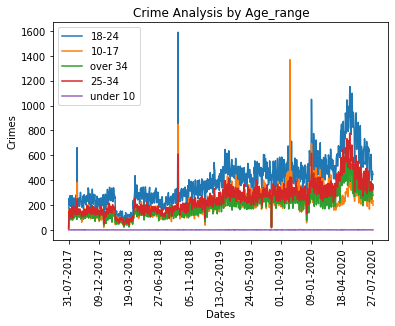

In [43]:
age_data = ['18-24', '10-17', 'over 34', '25-34', 'under 10']
# age_data = ['18-24', '10-17', 'over 34']
multiplots_with_date_and_columns_value(raw_data, age_data, 'Age_range')

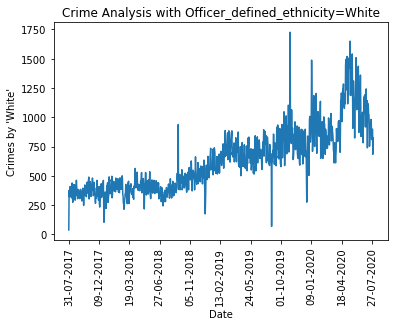

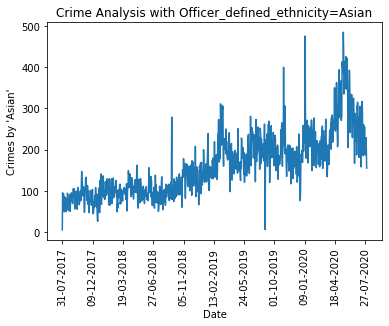

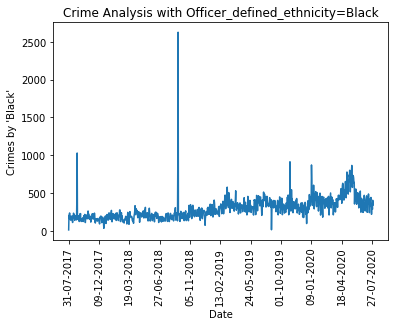

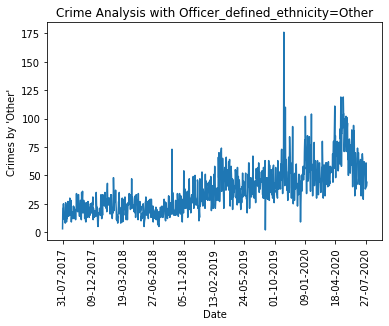

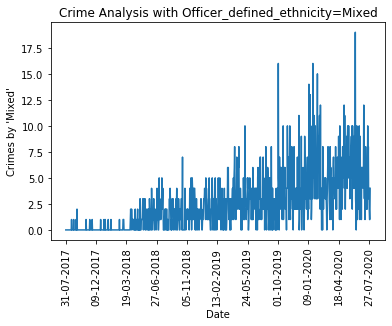

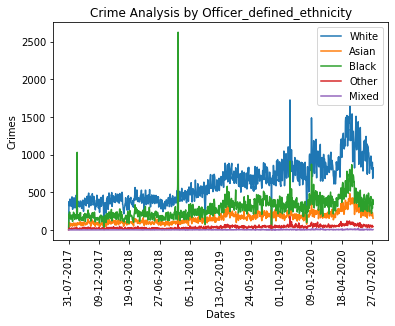

In [44]:
col_name = 'Officer_defined_ethnicity'
data = ['White', 'Asian', 'Black', 'Other', 'Mixed']
multiplots_with_date_and_columns_value(raw_data, data, col_name)

In [45]:
# for key, val in group_data_month:
#     print(key, val.shape)

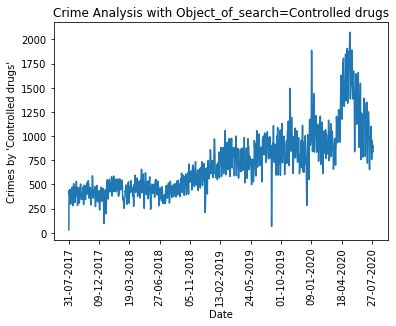

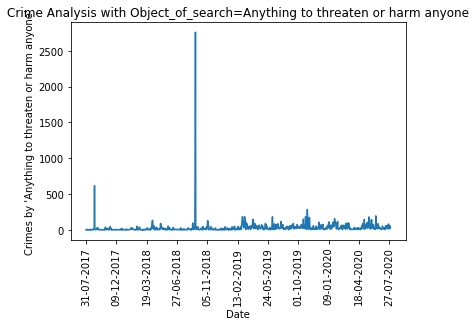

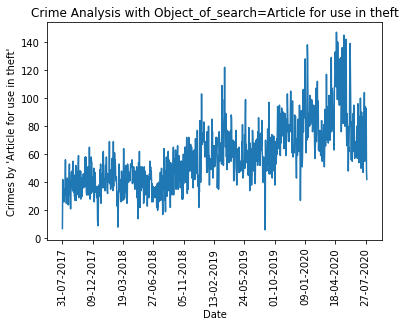

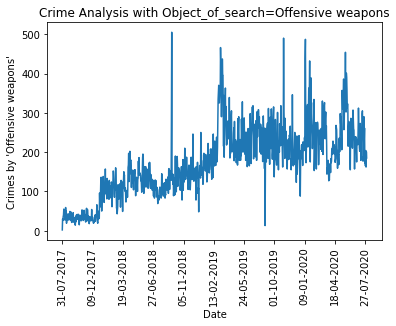

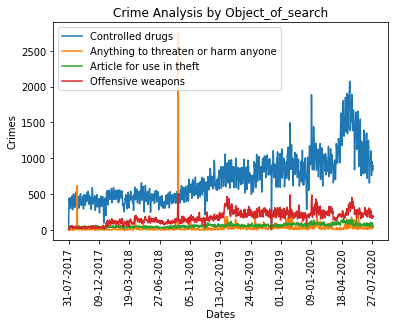

In [46]:
col_name = 'Object_of_search'
data = ['Controlled drugs', 'Anything to threaten or harm anyone',
  'Article for use in theft', 'Offensive weapons']
multiplots_with_date_and_columns_value(raw_data, data, col_name)

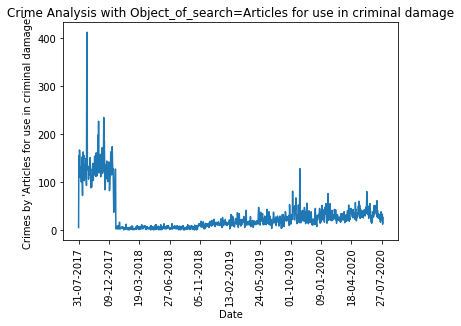

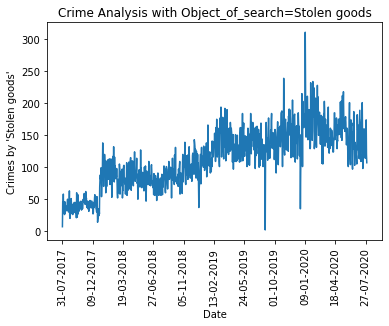

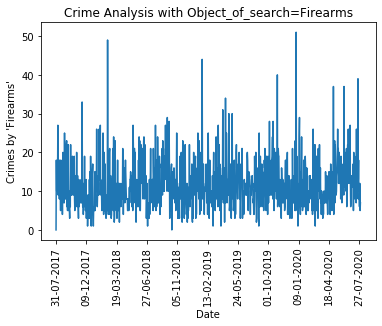

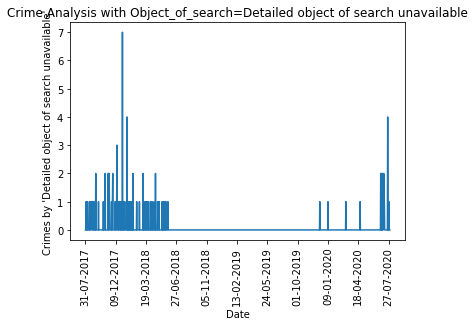

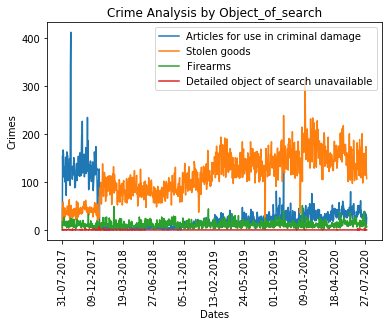

In [47]:
col_name = 'Object_of_search'
data =  ['Articles for use in criminal damage', 'Stolen goods', 'Firearms',
 'Detailed object of search unavailable']
multiplots_with_date_and_columns_value(raw_data, data, col_name)

In [20]:
raw_data.columns

Index(['Unnamed: 0', 'Record_ID', 'Type', 'Date',
       'Part_of_a_policing_operation', 'Policing_operation', 'Latitude',
       'Longitude', 'Gender', 'Age_range', 'Self_defined_ethnicity',
       'Officer_defined_ethnicity', 'Legislation', 'Object_of_search',
       'Outcome', 'Outcome_linked_to_object_of_search',
       'Removal_of_more_than_just_outer_clothing', 'Reported_by',
       'census_date', 'Formatted_Date', 'Small_Date', 'Month_Year',
       'Month_Year_Without_Format', 'Small_Timestamp'],
      dtype='object')

In [21]:
from collections import Counter
from pprint import pprint
def replace_nan_nodata(data):
    ret_data = []
    for val in data:
        try:
            if np.nan in [val]:
                ret_data.append('NoData Available')
            else:
                ret_data.append(val)
        except:
            ret_data.append(val)
    return ret_data

def display_counter(data, col_name):
    Counter_values = Counter(data[col_name])
    key_values = replace_nan_nodata(Counter_values.keys())
    values = replace_nan_nodata(Counter_values.values())
    key_data = {}
    for key, val in zip(key_values, values):
        key_data[key] = val
    pprint(key_data)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
def find_counter_column(data, col_name, plot_off=True, rotation=45):
    Counter_values = Counter(data[col_name])
    if plot_off == False:
        key_values = replace_nan_nodata(Counter_values.keys())
        values = replace_nan_nodata(Counter_values.values())
        plt.bar(key_values, values)
        plt.xlabel(col_name)
        plt.ylabel('Frequency')
        plt.title(f'Frequency Analysis of {col_name}')
        plt.xticks(rotation=rotation)
        plt.show()
    return Counter_values

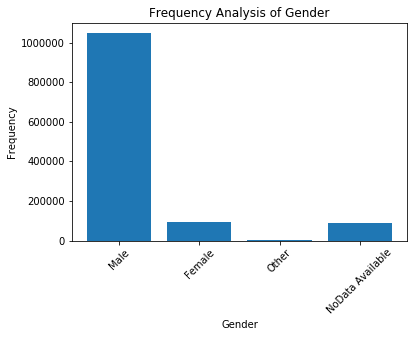

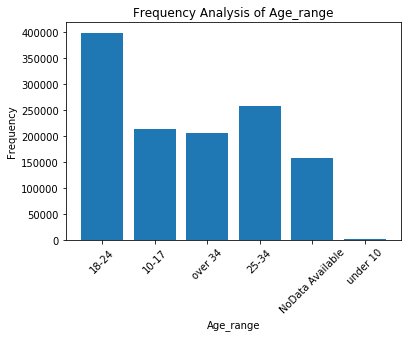

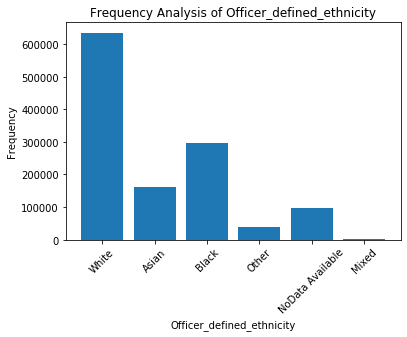

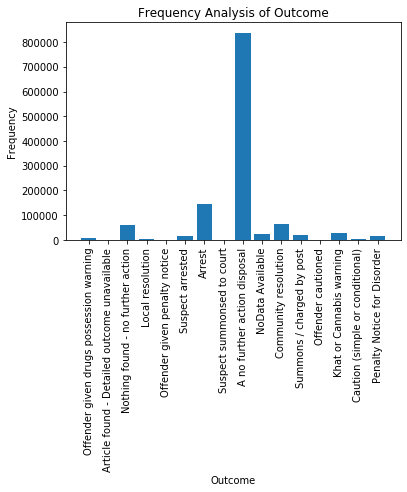

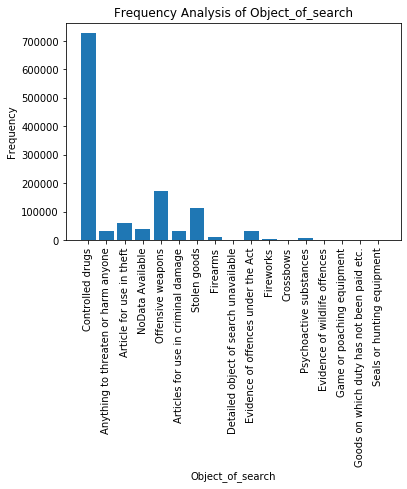

Counter({'Controlled drugs': 727948,
         'Anything to threaten or harm anyone': 30672,
         'Article for use in theft': 59260,
         nan: 38301,
         'Offensive weapons': 173782,
         'Articles for use in criminal damage': 32078,
         'Stolen goods': 114229,
         'Firearms': 11741,
         'Detailed object of search unavailable': 99,
         'Evidence of offences under the Act': 32613,
         'Fireworks': 4476,
         'Crossbows': 39,
         'Psychoactive substances': 6763,
         'Evidence of wildlife offences': 58,
         'Game or poaching equipment': 183,
         'Goods on which duty has not been paid etc.': 62,
         'Seals or hunting equipment': 5})

In [23]:
find_counter_column(raw_data, 'Gender', plot_off = False)
find_counter_column(raw_data, 'Age_range', plot_off = False)
find_counter_column(raw_data, 'Officer_defined_ethnicity', plot_off = False)
find_counter_column(raw_data, 'Outcome', plot_off = False, rotation=90)
find_counter_column(raw_data, 'Object_of_search', plot_off = False, rotation=90)
find_counter_column(raw_data, 'Legislation', plot_off = False, rotation=90)

In [24]:
display_counter(raw_data, 'Legislation')

{'Aviation Security Act 1982 (section 27(1))': 66,
 'Conservation of Seals Act 1970 (section 4)': 2,
 'Criminal Justice Act 1988 (section 139B)': 838,
 'Criminal Justice and Public Order Act 1994 (section 60)': 29686,
 'Crossbows Act 1987 (section 4)': 13,
 'Customs and Excise Management Act 1979 (section 163)': 31,
 'Deer Act 1991 (section 12)': 4,
 'Environmental Protection Act 1990 (section 34B )': 19,
 'Firearms Act 1968 (section 47)': 10159,
 'Misuse of Drugs Act 1971 (section 23)': 733810,
 'NoData Available': 49831,
 'Poaching Prevention Act 1862 (section 2)': 321,
 'Police and Criminal Evidence Act 1984 (section 1)': 407220,
 'Police and Criminal Evidence Act 1984 (section 6)': 27,
 'Protection of Badgers Act 1992 (section 11)': 18,
 'Psychoactive Substances Act 2016 (s36(2))': 179,
 'Psychoactive Substances Act 2016 (s37(2))': 5,
 'Public Stores Act 1875 (section 6)': 13,
 'Sporting Events Act 1985 (section 7)': 9,
 'Wildlife and Countryside Act 1981 (section 19)': 58}


In [26]:
for col_name in raw_data.columns:
    print(col_name)
    print(raw_data[col_name].unique())
    

Unnamed: 0
[1211745 1210507 1211744 ...     924     925     926]
Record_ID
[1211736 1210501 1211735 ...     920     921     922]
Type
['Person search' 'Person and Vehicle search' 'Vehicle search']
Date
['2017-07-31 23:00:00.000' '2017-07-31 23:01:00.000'
 '2017-07-31 23:03:00.000' ... '2020-07-31 23:45:00.000'
 '2020-07-31 23:53:00.000' '2020-07-31 23:54:00.000']
Part_of_a_policing_operation
[nan False True]
Policing_operation
[nan]
Latitude
[      nan 53.806672 50.585679 ... 50.678929 52.634041 52.606245]
Longitude
[      nan -1.68647  -2.472907 ... -1.123186  1.328966  0.382397]
Gender
['Male' 'Female' 'Other' nan]
Age_range
['18-24' '10-17' 'over 34' '25-34' nan 'under 10']
Self_defined_ethnicity
['White - English/Welsh/Scottish/Northern Irish/British' nan
 'Asian/Asian British - Pakistani'
 'Mixed/Multiple ethnic groups - White and Black Caribbean'
 'Black/African/Caribbean/Black British - African'
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean backgrou